<center><h1>Rashinkar_Payal_HW7</h1></center>

Name: Payal Rashinkar
<br>
Github Username: PayalRashinkar
<br>
USC ID: 3885-1419-03

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from collections import Counter

In [2]:
import warnings
warnings.filterwarnings("ignore")

### (a) Download the Anuran Calls (MFCCs) Data Set

In [3]:
df = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')

In [4]:
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [5]:
X=df.iloc[:,:-4]
y=df.iloc[:,-4:]
y=y.drop(['RecordID'],axis=1)

In [6]:
X

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895


In [7]:
y

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraAndre
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Leptodactylidae,Adenomera,AdenomeraAndre
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
7190,Hylidae,Scinax,ScinaxRuber
7191,Hylidae,Scinax,ScinaxRuber
7192,Hylidae,Scinax,ScinaxRuber
7193,Hylidae,Scinax,ScinaxRuber


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
dataTrain = pd.concat([X_train,y_train],axis=1)
dataTrain = dataTrain.reset_index(drop=True)
dataTest = pd.concat([X_test,y_test],axis=1)
dataTest = dataTest.reset_index(drop=True)

### (b) Train a classifier for each label

#### (i) Research

Exact match: It is the most strict metric, indicating the percentage of samples that have all their labels classified correctly.The disadvantage of this measure is that multi-class classification problems have a chance of being partially correct, but here we ignore those partially correct matches. 
Hamming Score/Loss: In simplest of terms, Hamming-Loss is the fraction of labels that are incorrectly predicted, i.e., the fraction of the wrong labels to the total number of labels. The hamming loss would be 1/3 if just 2 of the 3 labels were correctly anticipated, as 1 wasn't.

In [10]:
def ematch(y, yp):
    tmp = 0
    for t, p in zip(y.values, yp.values):
        match = (t == p)
        if sum(match) == y.shape[1]:
            tmp += 1;
    match = tmp / y.shape[0]
    print("Exact match value is:",match)
    return match

In [11]:
def hloss(y, yp):
    temp = 0
    for t, p in zip(y.values, yp.values):
        miss = (t != p)
        temp += np.sum(miss)
    loss = temp / (y.shape[0] * y.shape[1])
    print("Hamming Loss is:",loss)
    return loss

#### (ii) Train a SVM for each of the labels

In [12]:
summ = {"classifier":[],"exact_match":[],"hamming_loss":[]}

In [13]:
#Raw attributes
params  = {"C": np.logspace(-5, 4, 10),"gamma": np.logspace(-5, 4, 10)}

y_pred_test = pd.DataFrame(columns=y_test.columns)
y_pred_train = pd.DataFrame(columns=y_train.columns)

for column in y_train.columns:
    y_train_temp = y_train[column]
    
    SVCModel = SVC(kernel="rbf", decision_function_shape='ovr')
    
    clf = GridSearchCV(SVCModel, params, cv=StratifiedKFold(10, random_state=42, shuffle=True), n_jobs=-1)
    
    clf.fit(X_train, y_train_temp)
    
    best_clf = clf.best_estimator_
    
    y_train_predict_val = best_clf.predict(X_train)
    y_pred_train.loc[:, column] = y_train_predict_val
    
    y_pred_val = best_clf.predict(X_test)    
    y_pred_test.loc[:, column] = y_pred_val
    
    print("The "+column+" column with Raw Data has the best parameters: ", clf.best_params_)

print("The evaluation for Train data using Raw attributes and Gaussian Kernel is: ")
ematch(y_train, y_pred_train)
hloss(y_train, y_pred_train)

print("The evaluation for Test data using Raw attributes and Gaussian Kernel is: ")
em = ematch(y_test, y_pred_test)
hl = hloss(y_test, y_pred_test)

summ["classifier"].append("Gaussian Kernel with Raw data")
summ["exact_match"].append(em)
summ["hamming_loss"].append(hl)

The Family column with Raw Data has the best parameters:  {'C': 100.0, 'gamma': 1.0}
The Genus column with Raw Data has the best parameters:  {'C': 100.0, 'gamma': 1.0}
The Species column with Raw Data has the best parameters:  {'C': 10.0, 'gamma': 1.0}
The evaluation for Train data using Raw attributes and Gaussian Kernel is: 
Exact match value is: 0.9990071485305798
Hamming Loss is: 0.0003309504898067249
The evaluation for Test data using Raw attributes and Gaussian Kernel is: 
Exact match value is: 0.9861046780917091
Hamming Loss is: 0.008337193144974525


In [14]:
# Standardized Attributes
params = {"C": np.logspace(-5, 4, 10),"gamma": np.logspace(-9, 5, 10)}

std=StandardScaler()
X_train_stand = std.fit_transform(X_train)
X_test_stand = std.transform(X_test)

y_predict_test = pd.DataFrame(columns=y_test.columns)
y_predict_train = pd.DataFrame(columns=y_train.columns)

for col in y_train.columns:
    y_train_temp = y_train[col]
    SVCModel = SVC(kernel="rbf", decision_function_shape='ovr')
    clf = GridSearchCV(SVCModel, params, cv=StratifiedKFold(10, random_state=42, shuffle=True), n_jobs=-1)
    clf.fit(X_train_stand, y_train_temp)
    best_clf = clf.best_estimator_
    
    y_train_predict = best_clf.predict(X_train_stand)
    y_predict_train.loc[:, col] = y_train_predict
    
    y_pred_val = best_clf.predict(X_test_stand)
    y_predict_test.loc[:, col] = y_pred_val
    
    print("The "+col+" column with Standardized Data has the best parameters:", clf.best_params_)

The Family column with Standardized Data has the best parameters: {'C': 10.0, 'gamma': 0.05994842503189409}
The Genus column with Standardized Data has the best parameters: {'C': 10.0, 'gamma': 0.05994842503189409}
The Species column with Standardized Data has the best parameters: {'C': 10.0, 'gamma': 0.05994842503189409}


In [15]:
print("The evaluation for Train data using Standardized attributes and Gaussian Kernel is:")
ematch(y_train, y_predict_train)
hloss(y_train, y_predict_train)

print("The evaluation for Test data using Standardized attributes and Gaussian Kernel is:")
em = ematch(y_test, y_predict_test)
hl = hloss(y_test, y_predict_test)

summ["classifier"].append("Gaussian Kernel with Standardized data")
summ["exact_match"].append(em)
summ["hamming_loss"].append(hl)

The evaluation for Train data using Standardized attributes and Gaussian Kernel is:
Exact match value is: 0.999801429706116
Hamming Loss is: 0.00013238019592268997
The evaluation for Test data using Standardized attributes and Gaussian Kernel is:
Exact match value is: 0.9861046780917091
Hamming Loss is: 0.009881117801451289


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [16]:
params = {"C": np.logspace(-5, 4, 10)}
y_predict_test = pd.DataFrame(columns=y_test.columns)
y_predict_train = pd.DataFrame(columns=y_train.columns)

for col in y_train.columns:
    y_train_temp = y_train[col]
    LinearSvc = LinearSVC(penalty='l1',dual = False, max_iter=10000)
    clf = GridSearchCV(LinearSvc, params, cv=StratifiedKFold(10, random_state=42, shuffle=True), n_jobs=-1)
    clf.fit(X_train_stand, y_train_temp)
    best_clf = clf.best_estimator_
    
    y_train_predict = best_clf.predict(X_train_stand)
    y_predict_train.loc[:, col] = y_train_predict
    
    y_pred_val = best_clf.predict(X_test_stand)
    y_predict_test.loc[:, col] = y_pred_val
    print("The "+col+" column with Standardized Data and L1 penalty has the best parameters:", clf.best_params_)

The Family column with Standardized Data and L1 penalty has the best parameters: {'C': 10.0}


/Users/payalrashinkar/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/payalrashinkar/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/payalrashinkar/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The Genus column with Standardized Data and L1 penalty has the best parameters: {'C': 1000.0}


/Users/payalrashinkar/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/payalrashinkar/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/payalrashinkar/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/payalrashinkar/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/payalrashinkar/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/payalrashinkar/anaconda3/lib/python3.10/sit

The Species column with Standardized Data and L1 penalty has the best parameters: {'C': 10.0}


In [17]:
print("The evaluation for Train data using Standardized attributes and L1 penalized SVM:")
ematch(y_train, y_predict_train)
hloss(y_train, y_predict_train)

print("The evaluation for Test data using Standardized attributes and L1 penalized SVM:")
em = ematch(y_test, y_predict_test)
hl = hloss(y_test, y_predict_test)

summ["classifier"].append("L1 Penalized SVM")
summ["exact_match"].append(em)
summ["hamming_loss"].append(hl)

The evaluation for Train data using Standardized attributes and L1 penalized SVM:
Exact match value is: 0.9251389992057188
Hamming Loss is: 0.04520783690759862
The evaluation for Test data using Standardized attributes and L1 penalized SVM:
Exact match value is: 0.9124594719777674
Hamming Loss is: 0.05697081982399259


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [18]:
params = {"C": np.logspace(1, 5, 5)}

y_predict_test = pd.DataFrame(columns=y_test.columns)
y_predict_train = pd.DataFrame(columns=y_train.columns)
classifiers ={}
for col in y_train.columns:
    y_train_temp = y_train[col]
    y_test_temp = y_test[col]
    
    smote = SMOTE(random_state=42)
    
    X_train_smote, y_train_smote = smote.fit_resample(X_train_stand, y_train_temp)
    X_test_smote, y_test_smote = smote.fit_resample(X_test_stand, y_test_temp)
    
    LinearSvc = LinearSVC(penalty='l1',dual = False, max_iter=10000)
    clf = GridSearchCV(LinearSvc, params, cv=StratifiedKFold(10, random_state=42, shuffle=True), n_jobs=-1)
    clf.fit(X_train_smote, y_train_smote)
    best_clf = clf.best_estimator_
    classifiers[col]=best_clf
    print("The "+col+" column using SMOTE has the best parameters as:", clf.best_params_)

for col in y_train.columns:
    svc = LinearSVC(penalty='l1',dual = False, max_iter=10000)    
    y_train_predict = classifiers[col].predict(X_train_stand)
    y_predict_train.loc[:, col] = y_train_predict
    y_pred = classifiers[col].predict(X_test_stand)
    y_predict_test.loc[:, col] = y_pred 

The Family column using SMOTE has the best parameters as: {'C': 10.0}
The Genus column using SMOTE has the best parameters as: {'C': 100.0}
The Species column using SMOTE has the best parameters as: {'C': 10.0}


In [19]:
print("The evaluation for Train data using SMOTE:")
ematch(y_train, y_predict_train)
hloss(y_train, y_predict_train)

print("The evaluation for Test data using SMOTE:")
eM = ematch(y_test, y_predict_test)
hL = hloss(y_test, y_predict_test)

summ["classifier"].append("SMOTE")
summ["exact_match"].append(eM)
summ["hamming_loss"].append(hL)

The evaluation for Train data using SMOTE:
Exact match value is: 0.8701350277998412
Hamming Loss is: 0.06347630394492984
The evaluation for Test data using SMOTE:
Exact match value is: 0.8531727651690597
Hamming Loss is: 0.07704184035819052


In [20]:
print(pd.DataFrame(summ))

                               classifier  exact_match  hamming_loss
0           Gaussian Kernel with Raw data     0.986105      0.008337
1  Gaussian Kernel with Standardized data     0.986105      0.009881
2                        L1 Penalized SVM     0.912459      0.056971
3                                   SMOTE     0.853173      0.077042


From the summary, we infer that the exact match evaluation for Gaussian Kernal with both Raw and Standardized data is same and the Hamming score/loss is lowest for Gaussian Kernal with Raw data. Hence, the Gassian Kernal classifier performs better than L1 and Smote.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

### (b) Determine which family is the majority

In [21]:
ham_Loss = []
ham_Dist = []
for i in range(1,51):
    avg_sc_tmp = []
    for k in range(2, 51):
        kmeans = KMeans(n_clusters=k, random_state=i)
        Z = kmeans.fit_predict(X)
        avg_sc_tmp.append(silhouette_score(X, Z))
    temp_best_k = avg_sc_tmp.index(max(avg_sc_tmp)) + 2  
    print('Iteration "'+str(i)+'" has the best k as ',temp_best_k)
    
    kmeans = KMeans(n_clusters=temp_best_k, random_state=i)
    Z = kmeans.fit_predict(X)
    
    mismatched = 0
    y['predicted'] = Z
    top_label = dict()
    for idx in range(temp_best_k):
        temp = {}
        matched_label = y[y['predicted'] == idx]
        for col in y.columns[:-1]:
            temp[col] = Counter(matched_label[col]).most_common(1)[0][0]
            mismatched += sum(matched_label[col] != temp[col])
        top_label[idx] = temp
    majority = pd.DataFrame(top_label).T
    print("The majority family for this k is ",majority)
    hammingdist = mismatched / y.shape[0]    
    hammingloss = mismatched / (y.shape[0] * 3)
    ham_Loss.append(hammingloss)
    ham_Dist.append(hammingdist)
    print("Hamming loss is ",hammingloss)
    print("Hamming Distance is",hammingdist)
    print("\n")

Iteration "1" has the best k as  4
The majority family for this k is              Family      Genus                 Species
0          Hylidae  Hypsiboas    HypsiboasCinerascens
1    Dendrobatidae   Ameerega      Ameeregatrivittata
2  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
3          Hylidae  Hypsiboas       HypsiboasCordobae
Hamming loss is  0.2224229789205467
Hamming Distance is 0.66726893676164


Iteration "2" has the best k as  4
The majority family for this k is              Family      Genus                 Species
0          Hylidae  Hypsiboas       HypsiboasCordobae
1  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2          Hylidae  Hypsiboas       HypsiboasCordobae
3  Leptodactylidae  Adenomera          AdenomeraAndre
Hamming loss is  0.24526291406069028
Hamming Distance is 0.7357887421820709


Iteration "3" has the best k as  4
The majority family for this k is              Family      Genus                 Species
0          Hylidae  Hypsiboas       Hypsibo

Iteration "21" has the best k as  4
The majority family for this k is              Family      Genus                 Species
0    Dendrobatidae   Ameerega      Ameeregatrivittata
1          Hylidae  Hypsiboas       HypsiboasCordobae
2  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
3          Hylidae  Hypsiboas    HypsiboasCinerascens
Hamming loss is  0.2224229789205467
Hamming Distance is 0.66726893676164


Iteration "22" has the best k as  4
The majority family for this k is              Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1          Hylidae  Hypsiboas    HypsiboasCinerascens
2          Hylidae  Hypsiboas       HypsiboasCordobae
3    Dendrobatidae   Ameerega      Ameeregatrivittata
Hamming loss is  0.2224229789205467
Hamming Distance is 0.66726893676164


Iteration "23" has the best k as  4
The majority family for this k is              Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHyl

Iteration "41" has the best k as  4
The majority family for this k is              Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1          Hylidae  Hypsiboas       HypsiboasCordobae
2          Hylidae  Hypsiboas    HypsiboasCinerascens
3    Dendrobatidae   Ameerega      Ameeregatrivittata
Hamming loss is  0.2224229789205467
Hamming Distance is 0.66726893676164


Iteration "42" has the best k as  4
The majority family for this k is              Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1          Hylidae  Hypsiboas       HypsiboasCordobae
2          Hylidae  Hypsiboas    HypsiboasCinerascens
3    Dendrobatidae   Ameerega      Ameeregatrivittata
Hamming loss is  0.2224229789205467
Hamming Distance is 0.66726893676164


Iteration "43" has the best k as  4
The majority family for this k is              Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHyl

### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [22]:
print("The avg of Hamming Distance is:", np.average(ham_Dist))
print("The avg of Hamming Score is:", np.average(1 - np.array(ham_Loss)))
print("The avg of Hamming Loss:", np.average(ham_Loss))
print("The Standard Deviation of Hamming Distance:", np.std(ham_Dist))
print("The Standard Deviation of Hamming Loss:", np.std(ham_Loss))

The avg of Hamming Distance is: 0.6712077831827656
The avg of Hamming Score is: 0.7762640722724111
The avg of Hamming Loss: 0.22373592772758863
The Standard Deviation of Hamming Distance: 0.031013504080750307
The Standard Deviation of Hamming Loss: 0.010337834693583431


## 3. ISLR 12.6.2

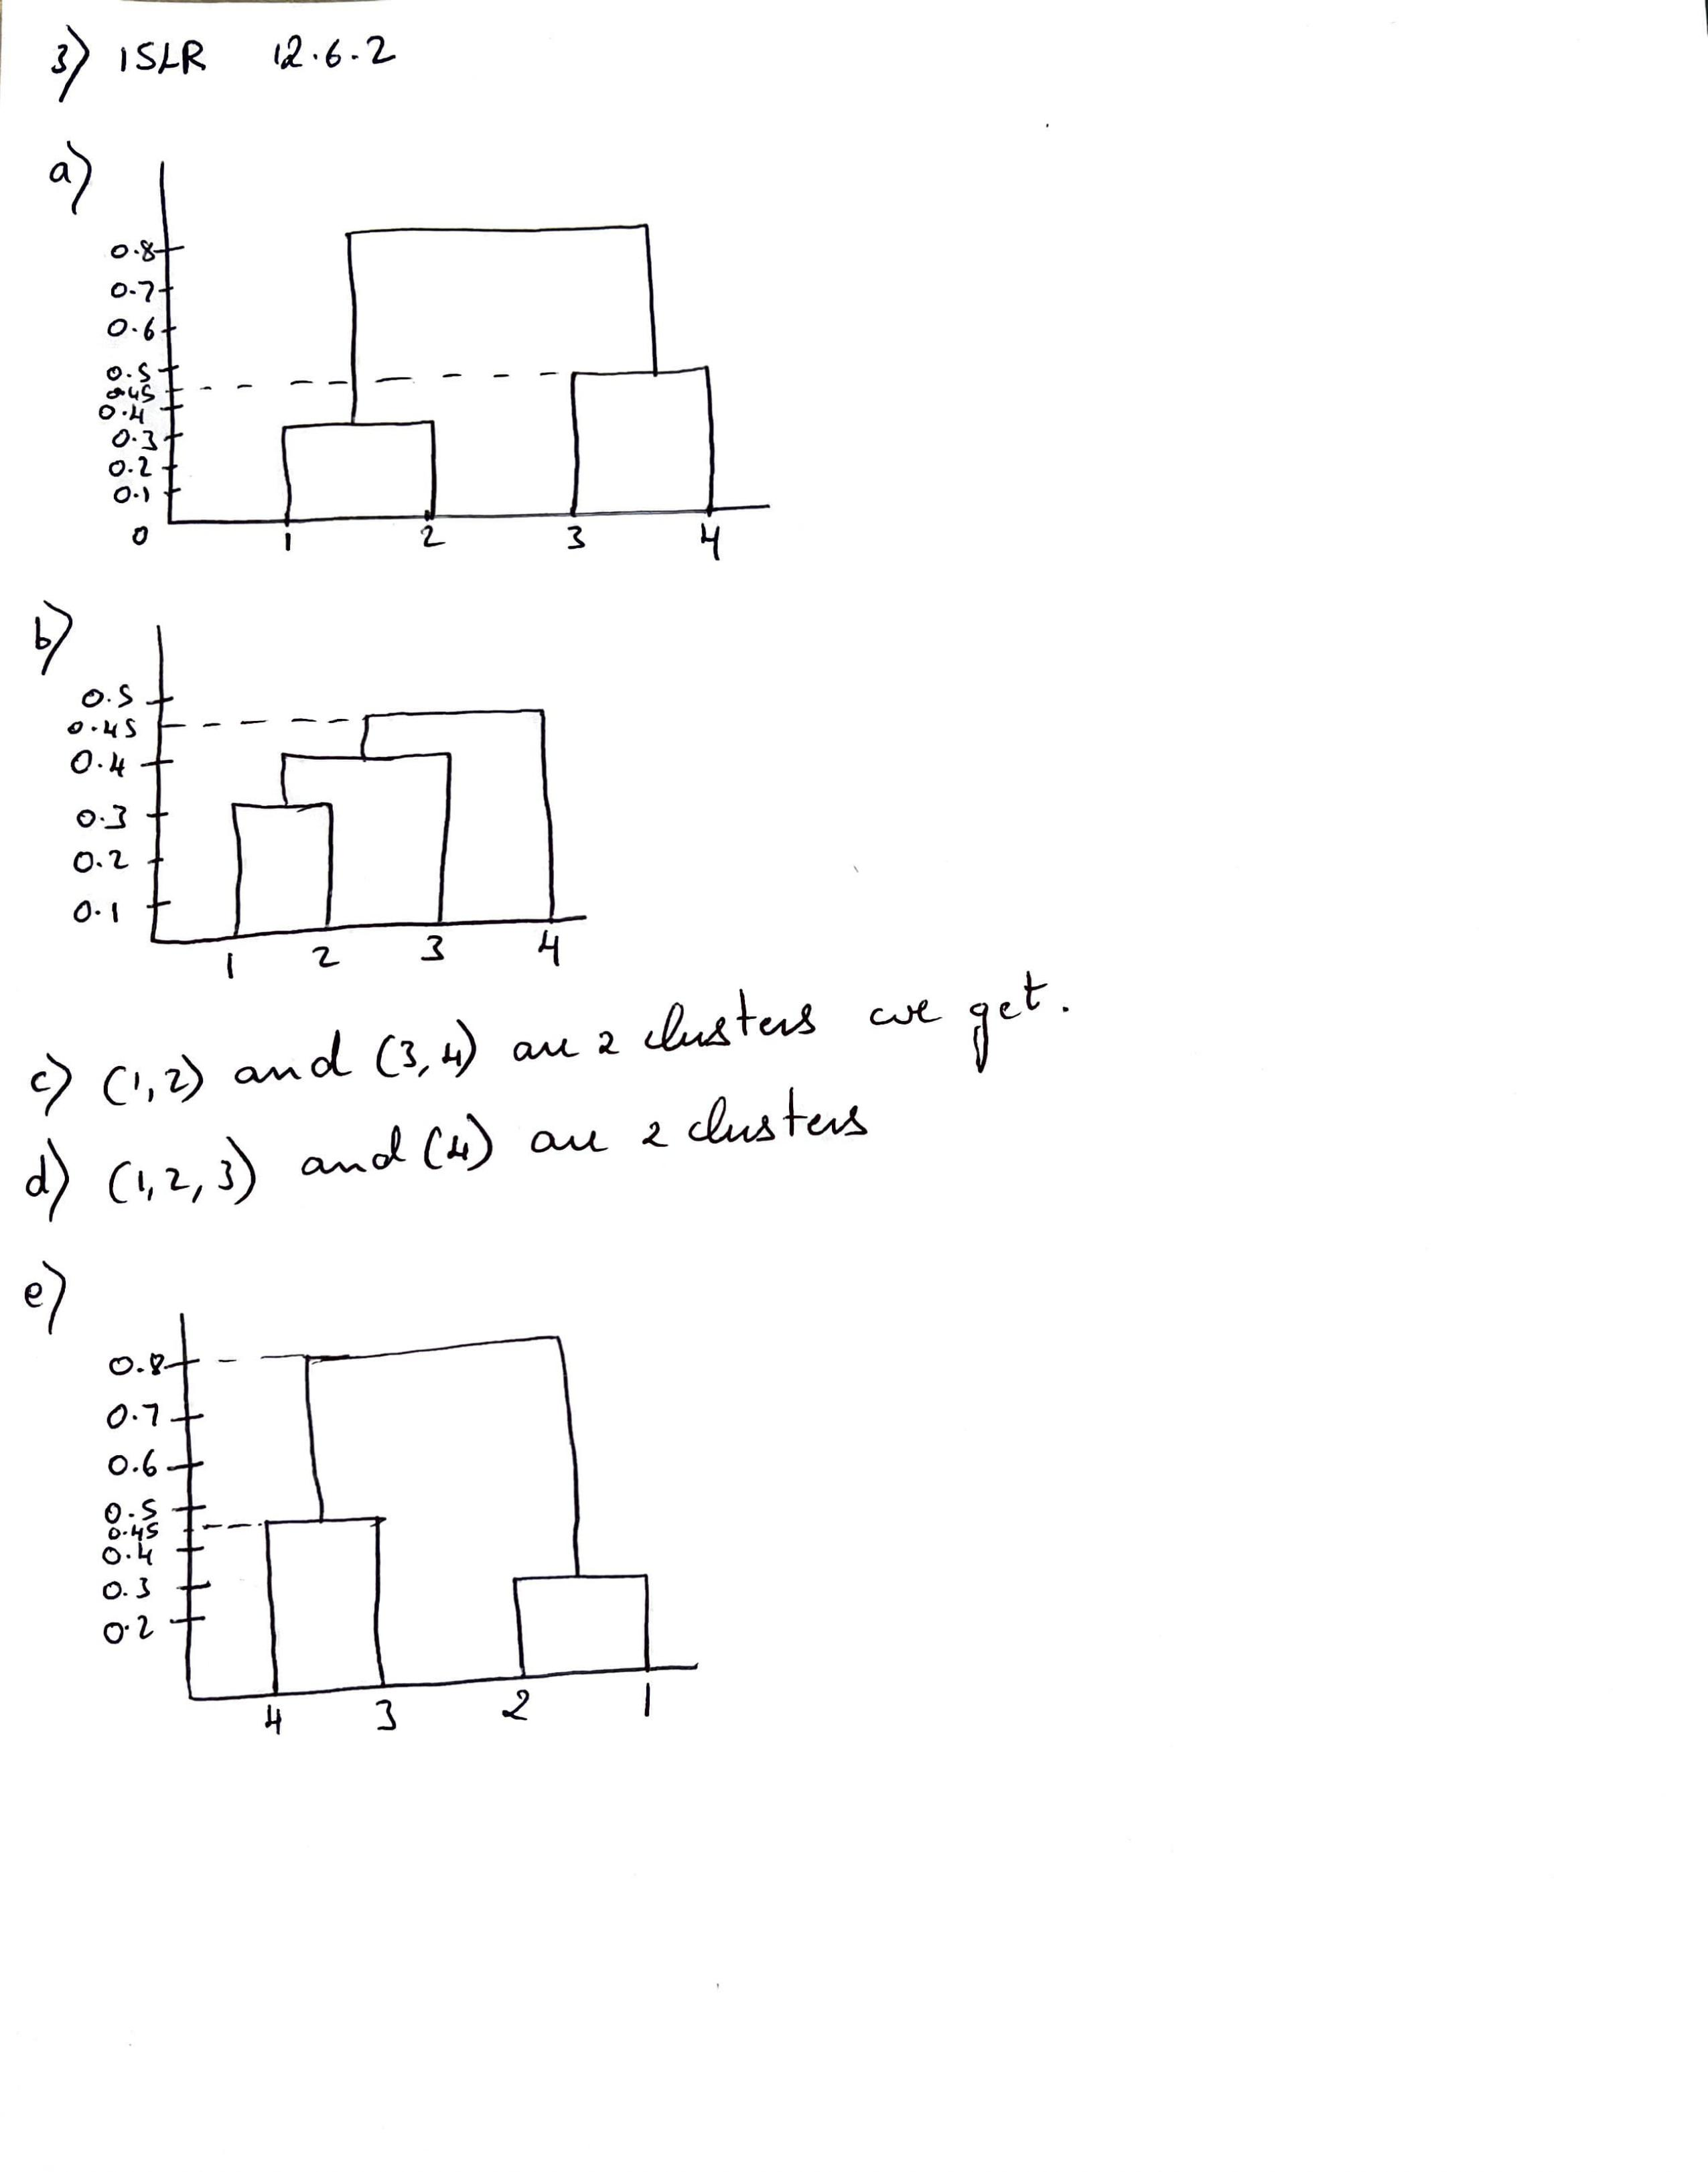